In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [2]:
import os
from tqdm.notebook import tqdm
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter
from PIL import Image
from rich.console import Console
from rich.table import Table
from rich.panel import Panel
from rich.progress import track
from rich.layout import Layout
from rich.markdown import Markdown
import random

In [3]:
ds = load_dataset("Nattakarn/fruit-and-vegetable-image-recognition")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/428M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/470M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/470M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/292M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2492 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/623 [00:00<?, ? examples/s]

In [15]:
console = Console()

target_dir = os.path.join(os.getcwd(), "complete_fruit_veg_dataset")
os.makedirs(target_dir, exist_ok=True)

train_dir = os.path.join(target_dir, "train")
test_dir = os.path.join(target_dir, "test")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

console.print("[bold blue]Extracting dataset...[/]")

with Progress() as progress:
    train_task = progress.add_task("[green]Extracting training images...", total=len(ds['train']))

    for i, example in enumerate(ds['train']):
        image = example['image']
        label = example['label']

        label_dir = os.path.join(train_dir, f"class_{label}")
        os.makedirs(label_dir, exist_ok=True)

        if image.mode != 'RGB':
            image = image.convert('RGB')

        image_path = os.path.join(label_dir, f"img_{i}.jpg")
        image.save(image_path)

        progress.update(train_task, advance=1)

    test_task = progress.add_task("[cyan]Extracting test images...", total=len(ds['test']))

    for i, example in enumerate(ds['test']):
        image = example['image']
        label = example['label']

        label_dir = os.path.join(test_dir, f"class_{label}")
        os.makedirs(label_dir, exist_ok=True)

        if image.mode != 'RGB':
            image = image.convert('RGB')

        image_path = os.path.join(label_dir, f"img_{i}.jpg")
        image.save(image_path)

        progress.update(test_task, advance=1)

console.print(f"[bold green]✓ Complete dataset extracted to {target_dir}[/]")

class_names = get_class_names(ds)

mapping_file = os.path.join(target_dir, "label_mapping.txt")
console.print(f"[bold blue]Creating label mapping file at[/] {mapping_file}")
with open(mapping_file, 'w') as f:
    for i, name in enumerate(class_names):
        f.write(f"{i}: {name}\n")

console.print(f"[bold green]✓ Created label mapping with {len(class_names)} classes[/]")

Extracting training images... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Extracting test images...     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━  96% 0:00:01

✓ Complete dataset extracted to /content/complete_fruit_veg_dataset

Creating label mapping file at /content/complete_fruit_veg_dataset/label_mapping.txt

✓ Created label mapping with 36 classes

─────────────────────────────── Dataset Analysis - Fruit and Vegetable Recognition ────────────────────────────────

                      Class Distribution Statistics                      
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Class ID ┃ Class Name    ┃ Training Samples ┃ Testing Samples ┃ Total ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│        0 │ apple         │               52 │              16 │    68 │
│        1 │ banana        │               55 │              20 │    75 │
│        2 │ beetroot      │               73 │              15 │    88 │
│        3 │ bell pepper   │               75 │              15 │    90 │
│        4 │ cabbage       │               74 │              18 │    92 │
│        5 │ capsicum      │               72 │              17 │    89 │
│        6 │ carrot        │               67 │              15 │    82 │
│        7 │ cauliflower   │               65 │              14 │    79 │
│        8 │ chilli pepper │               68 │              19 │    87 │
│        9 │ corn          │               66 │              21 │    87 │
│       10 │ cucumber      │               69 │              25 │    94 │
│       11 │ eggplant      │               70 │              14 │    84 │
│       12 │ garlic        │               76 │              16 │    92 │
│       13 │ ginger        │               53 │              15 │    68 │
│       14 │ grapes        │               78 │              22 │   100 │
│       15 │ jalepeno      │               73 │              15 │    88 │
│       16 │ kiwi          │               73 │              15 │    88 │
│       17 │ lemon         │               64 │              18 │    82 │
│       18 │ lettuce       │               77 │              20 │    97 │
│       19 │ mango         │               68 │              18 │    86 │
│       20 │ onion         │               75 │              19 │    94 │
│       21 │ orange        │               56 │              13 │    69 │
│       22 │ paprika       │               69 │              14 │    83 │
│       23 │ pear          │               73 │              16 │    89 │
│       24 │ peas          │               82 │              18 │   100 │
│       25 │ pineapple     │               80 │              19 │    99 │
│       26 │ pomegranate   │               68 │              11 │    79 │
│       27 │ potato        │               60 │              17 │    77 │
│       28 │ raddish       │               63 │              18 │    81 │
│       29 │ soy beans     │               78 │              19 │    97 │
│       30 │ spinach       │               71 │              26 │    97 │
│       31 │ sweetcorn     │               80 │              11 │    91 │
│       32 │ sweetpotato   │               56 │              13 │    69 │
│       33 │ tomato        │               70 │              22 │    92 │
│       34 │ turnip        │               82 │              16 │    98 │
│       35 │ watermelon    │               61 │              23 │    84 │
│    Total │               │             2492 │             623 │  3115 │
└──────────┴───────────────┴──────────────────┴─────────────────┴───────┘

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Generating class distribution visualizations...                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

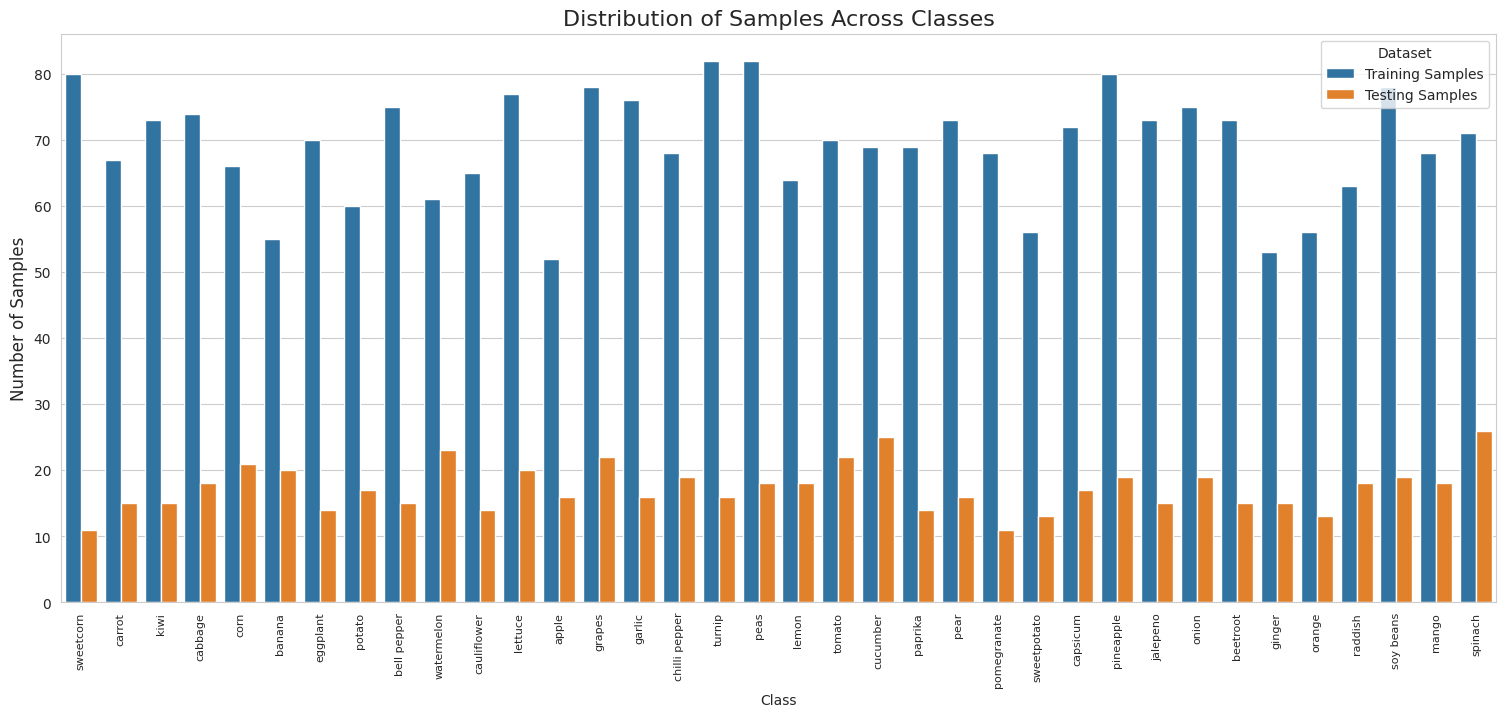

Class distribution plot saved to: /content/class_distribution.png

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Displaying sample images from each class...                                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

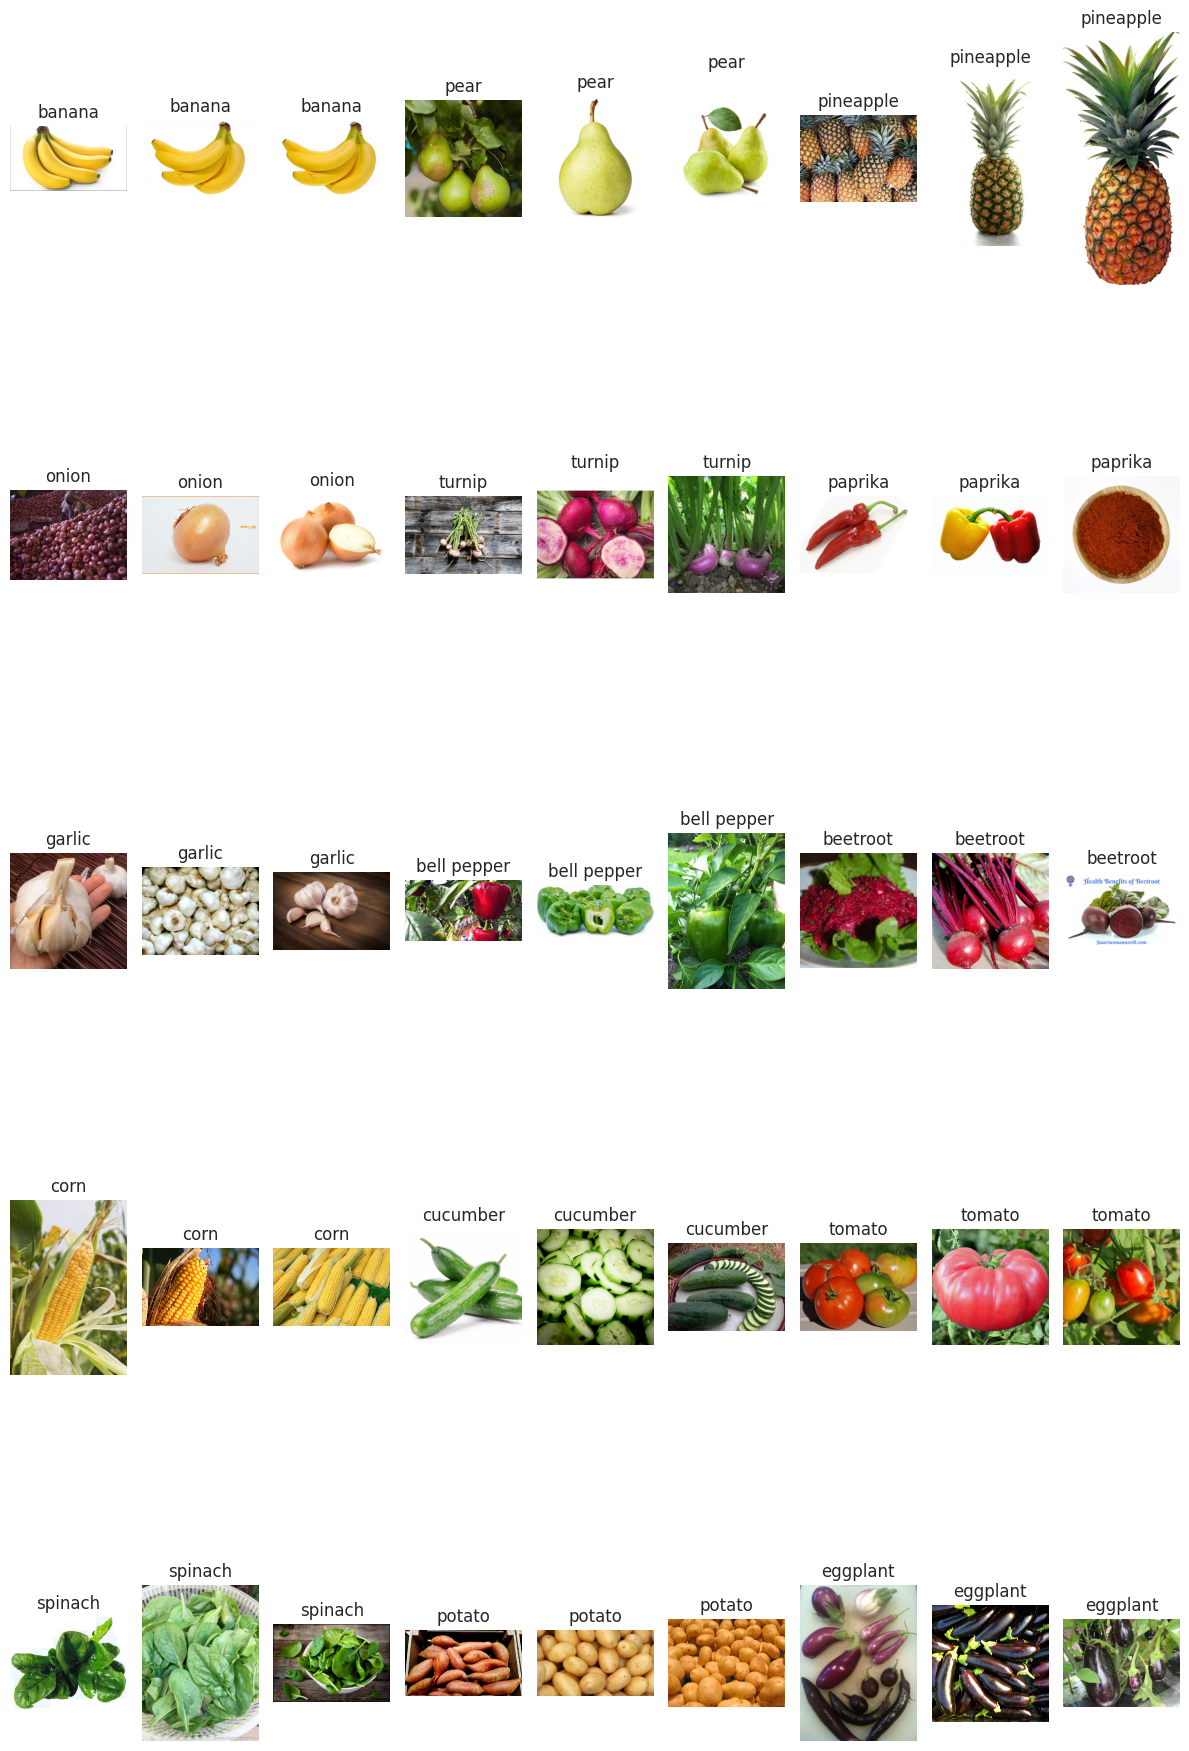

Sample images plot saved to: /content/sample_images.png

Dataset Summary                                                  

 • Total classes: 36                                                                                               
 • Total training images: 2492                                                                                     
 • Total testing images: 623                                                                                       
 • Total images: 3115                                                                                              
 • Image format: RGB                                                                                               
 • Storage location: /content/complete_fruit_veg_dataset

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Analysis Complete                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [16]:
console = Console()

def get_class_names(dataset):
    try:
        return dataset['train'].features['label'].names
    except (AttributeError, KeyError):
        return [f"Class {i}" for i in sorted(set(dataset['train']['label']))]

def count_samples_per_class(dataset, split='train'):
    labels = dataset[split]['label']
    return dict(Counter(labels))

console.rule("[bold blue]Dataset Analysis - Fruit and Vegetable Recognition[/]", style="blue")

class_names = get_class_names(ds)
train_counts = count_samples_per_class(ds, 'train')
test_counts = count_samples_per_class(ds, 'test')

table = Table(title="Class Distribution Statistics")
table.add_column("Class ID", justify="right", style="cyan")
table.add_column("Class Name", style="green")
table.add_column("Training Samples", justify="right", style="yellow")
table.add_column("Testing Samples", justify="right", style="yellow")
table.add_column("Total", justify="right", style="magenta")

total_train = 0
total_test = 0

for i in range(len(class_names)):
    class_name = class_names[i] if i < len(class_names) else f"Class {i}"
    train_count = train_counts.get(i, 0)
    test_count = test_counts.get(i, 0)
    total = train_count + test_count

    total_train += train_count
    total_test += test_count

    table.add_row(
        str(i),
        class_name,
        str(train_count),
        str(test_count),
        str(total)
    )

table.add_row(
    "Total",
    "",
    str(total_train),
    str(total_test),
    str(total_train + total_test),
    style="bold"
)

console.print(table)

console.print(Panel("[bold green]Generating class distribution visualizations...[/]"))

plt.figure(figsize=(15, 8))
df = pd.DataFrame({
    'Class': [class_names[i] if i < len(class_names) else f"Class {i}" for i in train_counts.keys()],
    'Training Samples': list(train_counts.values()),
    'Testing Samples': [test_counts.get(i, 0) for i in train_counts.keys()]
})

df_long = pd.melt(df, id_vars=['Class'], var_name='Dataset', value_name='Count')

sns.set_style("whitegrid")
ax = sns.barplot(x='Class', y='Count', hue='Dataset', data=df_long)
plt.title('Distribution of Samples Across Classes', fontsize=16)
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Number of Samples', fontsize=12)

plt.tight_layout(pad=0.5)
plt.subplots_adjust(bottom=0.25)


distribution_path = os.path.join(os.getcwd(), "class_distribution.png")
plt.savefig(distribution_path, bbox_inches='tight')
plt.show()

console.print(f"[bold green]Class distribution plot saved to:[/] {distribution_path}")

console.print(Panel("[bold green]Displaying sample images from each class...[/]"))

def get_sample_images(base_dir, n_samples=3):
    samples = {}
    for class_dir in os.listdir(base_dir):
        if class_dir.startswith("class_"):
            class_id = int(class_dir.split("_")[1])
            class_path = os.path.join(base_dir, class_dir)

            if os.path.isdir(class_path):
                image_files = [f for f in os.listdir(class_path) if f.endswith('.jpg')]

                if image_files:
                    selected_images = random.sample(image_files, min(n_samples, len(image_files)))
                    samples[class_id] = [os.path.join(class_path, img) for img in selected_images]

    return samples

def plot_sample_images(samples, class_names, rows=5):
    n_classes = len(samples)
    cols = 3  # number of samples per class

    rows = min(rows, (n_classes + 2) // 3)

    plt.figure(figsize=(12, rows * 4))

    for i, (class_id, image_paths) in enumerate(list(samples.items())[:rows*3]):
        class_name = class_names[class_id] if class_id < len(class_names) else f"Class {class_id}"

        for j, img_path in enumerate(image_paths[:cols]):
            plt.subplot(rows, cols * 3, i * cols + j + 1)
            img = Image.open(img_path)
            plt.imshow(np.array(img))
            plt.title(f"{class_name}")
            plt.axis('off')

    plt.tight_layout()


    samples_path = os.path.join(os.getcwd(), "sample_images.png")
    plt.savefig(samples_path)
    plt.show()

    return samples_path


train_samples = get_sample_images(train_dir)
samples_path = plot_sample_images(train_samples, class_names)

console.print(f"[bold green]Sample images plot saved to:[/] {samples_path}")


dataset_summary = f"""
## Dataset Summary
- Total classes: {len(class_names)}
- Total training images: {total_train}
- Total testing images: {total_test}
- Total images: {total_train + total_test}
- Image format: RGB
- Storage location: {os.path.abspath(target_dir)}
"""

console.print(Markdown(dataset_summary))

console.print(Panel("[bold blue]Analysis Complete[/]", style="blue"))

In [17]:
!pip install ultralytics

In [18]:
import os
import shutil
from rich.console import Console
from rich.tree import Tree
from rich.table import Table
from rich.panel import Panel
from rich.progress import track
from rich.markdown import Markdown
from rich.columns import Columns
from rich.progress import Progress
from collections import Counter
import random
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ultralytics import YOLO
import numpy as np

Reading class labels from /content/complete_fruit_veg_dataset/label_mapping.txt

Analyzing Dataset Structure...

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 📁 complete_fruit_veg_dataset                                                                                   │
│ ├── 📁 train                                                                                                    │
│ │   ├── 📁 class_0 (apple) (52 files)                                                                           │
│ │   │   └── 📄 ... (52 files)                                                                                   │
│ │   ├── 📁 class_1 (banana) (55 files)                                                                          │
│ │   │   └── 📄 ... (55 files)                                                                                   │
│ │   ├── 📁 class_10 (cucumber) (69 files)                                                                       │
│ │   │   └── 📄 ... (69 files)                                                                                   │
│ │   ├── 📁 class_11 (eggplant) (70 files)                                                                       │
│ │   │   └── 📄 ... (70 files)                                                                                   │
│ │   ├── 📁 class_12 (garlic) (76 files)                                                                         │
│ │   │   └── 📄 ... (76 files)                                                                                   │
│ │   ├── 📁 class_13 (ginger) (53 files)                                                                         │
│ │   │   └── 📄 ... (53 files)                                                                                   │
│ │   ├── 📁 class_14 (grapes) (78 files)                                                                         │
│ │   │   └── 📄 ... (78 files)                                                                                   │
│ │   ├── 📁 class_15 (jalepeno) (73 files)                                                                       │
│ │   │   └── 📄 ... (73 files)                                                                                   │
│ │   ├── 📁 class_16 (kiwi) (73 files)                                                                           │
│ │   │   └── 📄 ... (73 files)                                                                                   │
│ │   ├── 📁 class_17 (lemon) (64 files)                                                                          │
│ │   │   └── 📄 ... (64 files)                                                                                   │
│ │   ├── 📁 class_18 (lettuce) (77 files)                                                                        │
│ │   │   └── 📄 ... (77 files)                                                                                   │
│ │   ├── 📁 class_19 (mango) (68 files)                                                                          │
│ │   │   └── 📄 ... (68 files)                                                                                   │
│ │   ├── 📁 class_2 (beetroot) (73 files)                                                                        │
│ │   │   └── 📄 ... (73 files)                                                                                   │
│ │   ├── 📁 class_20 (onion) (75 files)                                                                          │
│ │   │   └── 📄 ... (75 files)                                                                                   │
│ │   ├── 📁 class_21 (orange) (56 files)                                                                         │
│ │   │   └── 📄 ... (56 files)                                                                                   │
│ │   ├── 📁 class_22 (paprika) (69 files)                                                                        │
│ │   │   └── 📄 ... (69 files)                                                           

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│     Dataset Structure Summary                                                                                   │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓                                                                              │
│ ┃ Metric           ┃ Value       ┃                                                                              │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩                                                                              │
│ │ Total Classes    │ 36          │                                                                              │
│ │ Total Files      │ 3115        │                                                                              │
│ │ Training Files   │ 2492        │                                                                              │
│ │ Testing Files    │ 623         │                                                                              │
│ │ Train/Test Split │ 80.0%/20.0% │                                                                              │
│ └──────────────────┴─────────────┘                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Class Distribution Analysis

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                            Class Distribution                                                                   │
│ ┏━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━┓                                       │
│ ┃ Class ID ┃ Class Name    ┃ Training Samples ┃ Testing Samples ┃ Total ┃                                       │
│ ┡━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━┩                                       │
│ │  Class 0 │ apple         │               52 │              16 │    68 │                                       │
│ │  Class 1 │ banana        │               55 │              20 │    75 │                                       │
│ │  Class 2 │ beetroot      │               73 │              15 │    88 │                                       │
│ │  Class 3 │ bell pepper   │               75 │              15 │    90 │                                       │
│ │  Class 4 │ cabbage       │               74 │              18 │    92 │                                       │
│ │  Class 5 │ capsicum      │               72 │              17 │    89 │                                       │
│ │  Class 6 │ carrot        │               67 │              15 │    82 │                                       │
│ │  Class 7 │ cauliflower   │               65 │              14 │    79 │                                       │
│ │  Class 8 │ chilli pepper │               68 │              19 │    87 │                                       │
│ │  Class 9 │ corn          │               66 │              21 │    87 │                                       │
│ │ Class 10 │ cucumber      │               69 │              25 │    94 │                                       │
│ │ Class 11 │ eggplant      │               70 │              14 │    84 │                                       │
│ │ Class 12 │ garlic        │               76 │              16 │    92 │                                       │
│ │ Class 13 │ ginger        │               53 │              15 │    68 │                                       │
│ │ Class 14 │ grapes        │               78 │              22 │   100 │                                       │
│ │ Class 15 │ jalepeno      │               73 │              15 │    88 │                                       │
│ │ Class 16 │ kiwi          │               73 │              15 │    88 │                                       │
│ │ Class 17 │ lemon         │               64 │              18 │    82 │                                       │
│ │ Class 18 │ lettuce       │               77 │              20 │    97 │                                       │
│ │ Class 19 │ mango         │               68 │              18 │    86 │                                       │
│ │ Class 20 │ onion         │               75 │              19 │    94 │                                       │
│ │ Class 21 │ orange        │               56 │              13 │    69 │                                       │
│ │ Class 22 │ paprika       │               69 │              14 │    83 │                                       │
│ │ Class 23 │ pear          │               73 │              16 │    89 │                                       │
│ │ Class 24 │ peas          │               82 │              18 │   100 │                                       │
│ │ Class 25 │ pineapple     │               80 │              19 │    99 │                                       │
│ │ Class 26 │ pomegranate   │               68 │              11 │    79 │                                       │
│ │ Class 27 │ potato        │               60 │              17 │    77 │                                       │
│ │ Class 28 │ raddish       │               63 │              18 │    81 │                                       │
│ │ Class 29 │ soy beans     │               78 │       

Class distribution visualization saved as: class_distribution_explorer.png

──────────────────────────────────────────── Dataset Overview Complete ────────────────────────────────────────────

Summary                                                      

 • The dataset contains 36 classes of fruits and vegetables                                                        
 • Total of 3115 image files across train and test splits                                                          
 • Training set: 2492 images (80.0%)                                                                               
 • Testing set: 623 images (20.0%)                                                                                 
 • Dataset location: /content/complete_fruit_veg_dataset

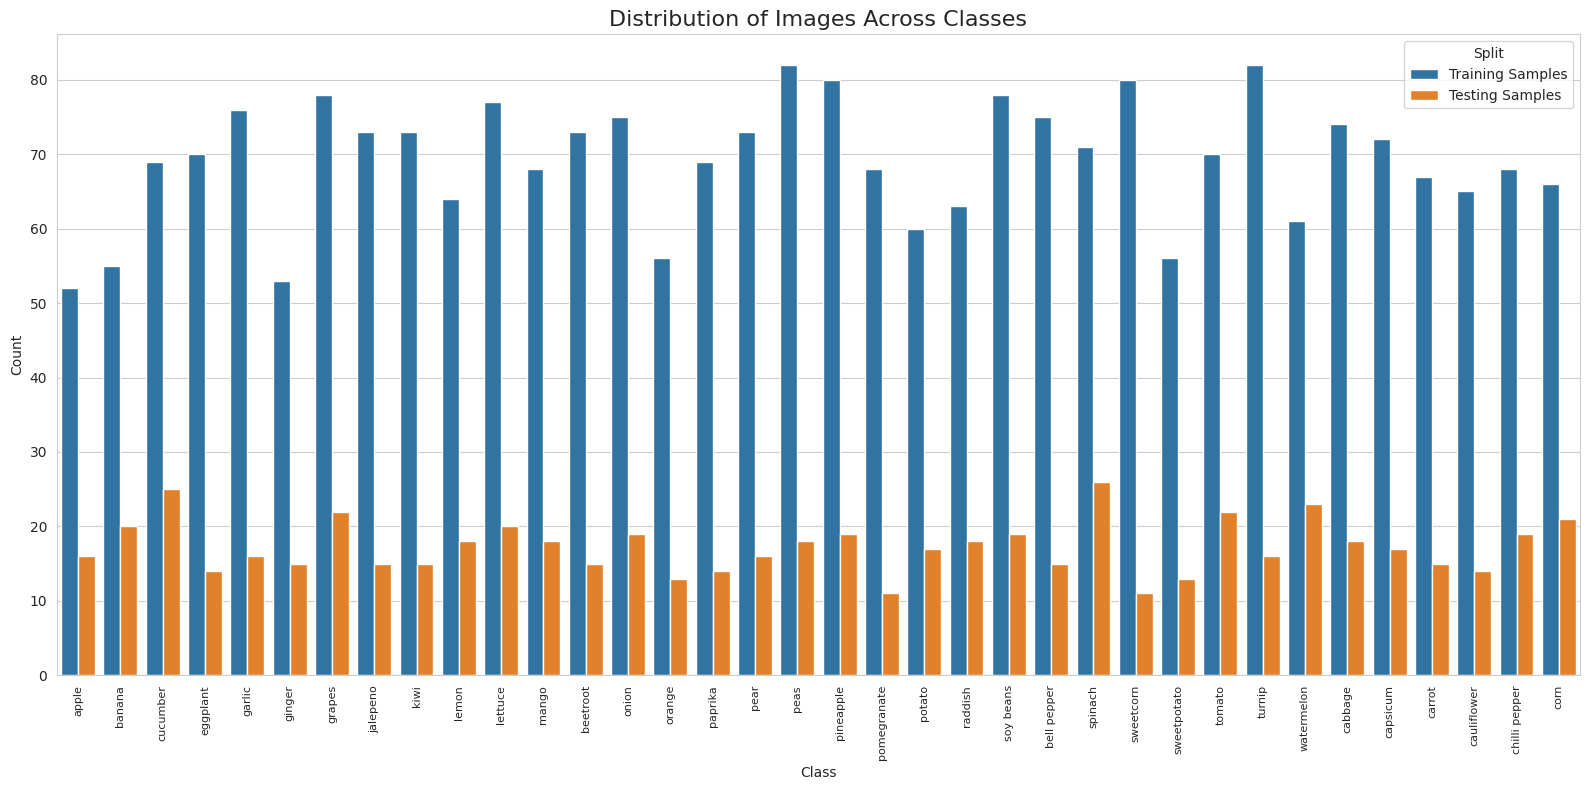

In [19]:
console = Console()

dataset_dir = os.path.join(os.getcwd(), "complete_fruit_veg_dataset")
train_dir = os.path.join(dataset_dir, "train")
test_dir = os.path.join(dataset_dir, "test")
mapping_file = os.path.join(dataset_dir, "label_mapping.txt")

class_names = {}
if os.path.exists(mapping_file):
    console.print(f"[green]Reading class labels from {mapping_file}[/]")
    with open(mapping_file, 'r') as f:
        for line in f:
            line = line.strip()
            if line:
                parts = line.split(':')
                if len(parts) == 2:
                    class_id = parts[0].strip()
                    class_name = parts[1].strip()
                    class_names[class_id] = class_name
else:
    console.print(f"[yellow]Warning: Label mapping file not found at {mapping_file}[/]")

def get_class_name(class_id):
    if class_id in class_names:
        return class_names[class_id]
    else:
        return f"Class {class_id}"

total_files = 0
total_classes = 0
train_files = 0
test_files = 0
class_counts = {}
class_file_sizes = {}

console.print("[bold blue]Analyzing Dataset Structure...[/]", justify="center")
console.print()

def add_directory_to_tree(path, tree):
    global total_files, total_classes
    directories = []
    files = []

    for item in os.listdir(path):
        item_path = os.path.join(path, item)
        if os.path.isdir(item_path):
            directories.append(item)
            if item.startswith("class_"):
                total_classes += 1
        else:
            files.append(item)
            total_files += 1

    for dirname in sorted(directories):
        dir_path = os.path.join(path, dirname)
        dir_files = len([f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))])

        if dirname.startswith("class_"):
            class_id = dirname.split("_")[1]
            if class_id not in class_counts:
                class_counts[class_id] = {"train": 0, "test": 0}

            if "train" in path:
                class_counts[class_id]["train"] += dir_files
            else:
                class_counts[class_id]["test"] += dir_files

            # Use actual class name in the tree
            class_display_name = get_class_name(class_id)
            branch = tree.add(f"📁 [bold cyan]{dirname} ({class_display_name})[/] ({dir_files} files)")
        else:
            branch = tree.add(f"📁 [bold cyan]{dirname}[/] ({dir_files} files)")

        add_directory_to_tree(os.path.join(path, dirname), branch)

    if len(files) <= 10:
        for filename in sorted(files):
            tree.add(f"📄 {filename}")
    else:
        tree.add(f"📄 ... ({len(files)} files)")

root = Tree("[bold green]📁 complete_fruit_veg_dataset[/]")

if os.path.exists(train_dir):
    train_branch = root.add("[bold yellow]📁 train[/]")
    add_directory_to_tree(train_dir, train_branch)
    train_files = sum(len(files) for _, _, files in os.walk(train_dir))

if os.path.exists(test_dir):
    test_branch = root.add("[bold yellow]📁 test[/]")
    add_directory_to_tree(test_dir, test_branch)
    test_files = sum(len(files) for _, _, files in os.walk(test_dir))

console.print(Panel(root))
console.print()

table = Table(title="Dataset Structure Summary")
table.add_column("Metric", style="cyan")
table.add_column("Value", style="green")

total_classes_found = len(class_counts)
table.add_row("Total Classes", str(total_classes_found))
table.add_row("Total Files", str(total_files))
table.add_row("Training Files", str(train_files))
table.add_row("Testing Files", str(test_files))
table.add_row("Train/Test Split", f"{train_files/(train_files+test_files):.1%}/{test_files/(train_files+test_files):.1%}")

console.print(Panel(table))
console.print()

console.print("[bold blue]Class Distribution Analysis[/]", justify="center")
console.print()

class_table = Table(title="Class Distribution")
class_table.add_column("Class ID", justify="right", style="cyan")
class_table.add_column("Class Name", style="green")
class_table.add_column("Training Samples", justify="right", style="yellow")
class_table.add_column("Testing Samples", justify="right", style="yellow")
class_table.add_column("Total", justify="right", style="magenta")

for class_id, counts in sorted(class_counts.items(), key=lambda x: int(x[0])):
    train_count = counts["train"]
    test_count = counts["test"]
    total = train_count + test_count
    class_name = get_class_name(class_id)
    class_table.add_row(
        f"Class {class_id}",
        class_name,
        str(train_count),
        str(test_count),
        str(total)
    )

console.print(Panel(class_table))
console.print()

df = pd.DataFrame({
    'Class': [get_class_name(k) for k in class_counts.keys()],
    'Class ID': [f"Class {k}" for k in class_counts.keys()],
    'Training Samples': [v['train'] for v in class_counts.values()],
    'Testing Samples': [v['test'] for v in class_counts.values()]
})

df_long = pd.melt(df, id_vars=['Class', 'Class ID'], var_name='Split', value_name='Count')

plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
ax = sns.barplot(x='Class', y='Count', hue='Split', data=df_long)
plt.title('Distribution of Images Across Classes', fontsize=16)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.savefig("class_distribution_explorer.png", bbox_inches='tight')

console.print(f"[green]Class distribution visualization saved as: class_distribution_explorer.png[/]")
console.print()

console.rule("[bold blue]Dataset Overview Complete[/]")
console.print(Markdown(f"""
## Summary
- The dataset contains **{total_classes_found} classes** of fruits and vegetables
- Total of **{total_files} image files** across train and test splits
- Training set: **{train_files} images** ({train_files/(train_files+test_files):.1%})
- Testing set: **{test_files} images** ({test_files/(train_files+test_files):.1%})
- Dataset location: `{os.path.abspath(dataset_dir)}`
"""))

In [20]:
console = Console()
console.print("[bold blue]Setting up YOLO dataset structure...[/]")

dataset_dir = os.path.join(os.getcwd(), "complete_fruit_veg_dataset")
train_dir = os.path.join(dataset_dir, "train")
test_dir = os.path.join(dataset_dir, "test")
yolo_dir = os.path.join(os.getcwd(), "yolo_dataset")

os.makedirs(os.path.join(yolo_dir, "images", "train"), exist_ok=True)
os.makedirs(os.path.join(yolo_dir, "images", "val"), exist_ok=True)
os.makedirs(os.path.join(yolo_dir, "labels", "train"), exist_ok=True)
os.makedirs(os.path.join(yolo_dir, "labels", "val"), exist_ok=True)

console.print("[bold green]✓ Directory structure created[/]")

Setting up YOLO dataset structure...

✓ Directory structure created

In [21]:
mapping_file = os.path.join(dataset_dir, "label_mapping.txt")
class_names = {}
class_indices = {}  # to remap class IDs to be sequential from 0

if os.path.exists(mapping_file):
    console.print(f"[green]Reading class labels from {mapping_file}[/]")
    with open(mapping_file, 'r') as f:
        for idx, line in enumerate(f):
            line = line.strip()
            if line:
                parts = line.split(':')
                if len(parts) == 2:
                    orig_class_id = parts[0].strip()
                    class_name = parts[1].strip()
                    class_names[orig_class_id] = class_name
                    class_indices[orig_class_id] = idx  # Remap to sequential indices
else:
    console.print(f"[yellow]Warning: Label mapping file not found at {mapping_file}[/]")

with open(os.path.join(yolo_dir, "data.yaml"), 'w') as f:
    f.write(f"path: {os.path.abspath(yolo_dir)}\n")
    f.write(f"train: images/train\n")
    f.write(f"val: images/val\n")
    f.write(f"nc: {len(class_names)}\n")

    names_str = "["
    for i in range(len(class_names)):
        for k, v in class_indices.items():
            if v == i:
                names_str += f"'{class_names[k]}', "
                break
    names_str = names_str.rstrip(', ') + "]"
    f.write(f"names: {names_str}\n")

console.print("[bold green]✓ Created YOLO configuration file[/]")

Reading class labels from /content/complete_fruit_veg_dataset/label_mapping.txt

✓ Created YOLO configuration file

In [22]:
with Progress() as progress:
    train_task = progress.add_task("[green]Processing training images...", total=sum(len(files) for _, _, files in os.walk(train_dir)))

    for class_dir in os.listdir(train_dir):
        if not class_dir.startswith("class_"):
            continue

        class_id = class_dir.split('_')[1]
        yolo_class_id = class_indices.get(class_id, 0)

        class_path = os.path.join(train_dir, class_dir)

        for img_file in os.listdir(class_path):
            if not img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue

            unique_name = f"{class_id}_{img_file}"

            src_img_path = os.path.join(class_path, img_file)
            dst_img_path = os.path.join(yolo_dir, "images", "train", unique_name)
            shutil.copy2(src_img_path, dst_img_path)

            # Generate YOLO annotation
            # Format: <class_id> <center_x> <center_y> <width> <height>
            # All values are normalized (0-1)
            img = Image.open(src_img_path)

            # Create a bounding box covering ~80% of the image
            # (centered, since I don't know where the object actually is 😅)
            center_x = 0.5
            center_y = 0.5
            width = 0.8
            height = 0.8

            label_filename = os.path.splitext(unique_name)[0] + ".txt"
            label_path = os.path.join(yolo_dir, "labels", "train", label_filename)
            with open(label_path, 'w') as f:
                f.write(f"{yolo_class_id} {center_x} {center_y} {width} {height}\n")

            progress.update(train_task, advance=1)

    val_task = progress.add_task("[cyan]Processing validation images...", total=sum(len(files) for _, _, files in os.walk(test_dir)))

    for class_dir in os.listdir(test_dir):
        if not class_dir.startswith("class_"):
            continue

        class_id = class_dir.split('_')[1]
        yolo_class_id = class_indices.get(class_id, 0)

        class_path = os.path.join(test_dir, class_dir)

        for img_file in os.listdir(class_path):
            if not img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue

            unique_name = f"{class_id}_{img_file}"

            src_img_path = os.path.join(class_path, img_file)
            dst_img_path = os.path.join(yolo_dir, "images", "val", unique_name)
            shutil.copy2(src_img_path, dst_img_path)

            img = Image.open(src_img_path)

            center_x = 0.5
            center_y = 0.5
            width = 0.8
            height = 0.8

            label_filename = os.path.splitext(unique_name)[0] + ".txt"
            label_path = os.path.join(yolo_dir, "labels", "val", label_filename)
            with open(label_path, 'w') as f:
                f.write(f"{yolo_class_id} {center_x} {center_y} {width} {height}\n")

            progress.update(val_task, advance=1)

console.print("[bold green]✓ Dataset conversion complete![/]")

Output()

Processing training images... ━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━  67% 0:00:01

Processing training images... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺  98% 0:00:01

Processing training images...   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Processing validation images... ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   3% 0:00:01

✓ Dataset conversion complete!

In [23]:
train_images = len(os.listdir(os.path.join(yolo_dir, "images", "train")))
train_labels = len(os.listdir(os.path.join(yolo_dir, "labels", "train")))
val_images = len(os.listdir(os.path.join(yolo_dir, "images", "val")))
val_labels = len(os.listdir(os.path.join(yolo_dir, "labels", "val")))

console.print(f"[bold]Dataset Statistics:[/]")
console.print(f"Training images: {train_images}")
console.print(f"Training labels: {train_labels}")
console.print(f"Validation images: {val_images}")
console.print(f"Validation labels: {val_labels}")

console.print("\n[bold]Sample Annotations:[/]")
train_label_dir = os.path.join(yolo_dir, "labels", "train")
sample_labels = random.sample(os.listdir(train_label_dir), min(3, len(os.listdir(train_label_dir))))

for label_file in sample_labels:
    with open(os.path.join(train_label_dir, label_file), 'r') as f:
        content = f.read().strip()
    console.print(f"[cyan]{label_file}:[/] {content}")

Dataset Statistics:

Training images: 2492

Training labels: 2492

Validation images: 623

Validation labels: 623

Sample Annotations:

18_img_987.txt: 18 0.5 0.5 0.8 0.8

23_img_2350.txt: 23 0.5 0.5 0.8 0.8

10_img_1837.txt: 10 0.5 0.5 0.8 0.8

In [24]:
console = Console()
console.print(Panel("[bold blue]YOLO Training Setup[/]", title="YOLO Training"))

yaml_path = os.path.join(yolo_dir, "data.yaml")

console.print(f"[green]Using dataset configuration from:[/] {yaml_path}")
with open(yaml_path, 'r') as f:
    yaml_content = f.read()
console.print(f"[bold]Configuration File Contents:[/]\n{yaml_content}")

╭───────────────────────────────────────────────── YOLO Training ─────────────────────────────────────────────────╮
│ YOLO Training Setup                                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Using dataset configuration from: /content/yolo_dataset/data.yaml

Configuration File Contents:
path: /content/yolo_dataset
train: images/train
val: images/val
nc: 36
names: ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli 
pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 
'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy 
beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']

In [25]:
import torch
console = Console()
console.print(f"[bold green]CUDA Available: {torch.cuda.is_available()}[/]")
if torch.cuda.is_available():
    console.print(f"[bold green]GPU Device: {torch.cuda.get_device_name(0)}[/]")
    console.print(f"[bold green]Number of GPUs: {torch.cuda.device_count()}[/]")

CUDA Available: True

GPU Device: Tesla T4

Number of GPUs: 1

In [26]:
model = YOLO('yolov8l.pt')
# yolov8n.pt - Nano (smallest, fastest)
# yolov8s.pt - Small
# yolov8m.pt - Medium
# yolov8l.pt - Large
# yolov8x.pt - Extra Large (largest, most accurate)

console.print("[bold blue]Starting YOLO training...[/]")
console.print("[yellow]This may take a while depending on your hardware.[/]")

results = model.train(
    data=yaml_path,          # Path to dataset config
    epochs=50,               # Number of epochs
    imgsz=640,               # Image size
    batch=16,                # Batch size - reduce if you encounter memory issues
    patience=15,             # Early stopping patience
    name='fruit_veg_model',  # Project name
    verbose=True,            # Display training progress
    device='',               # Auto-select device (GPU if available)
    plots=True,              # Generate training plots

    lr0=0.001,               # Initial learning rate
    lrf=0.01,                # Final learning rate fraction
    box=7.5,                 # Box loss gain (increase to focus more on box accuracy)
    dfl=1.5,                 # DFL loss gain (reduce to lower its impact)
    overlap_mask=True,       # Helps with object boundaries
    mixup=0.15,              # Mixup data augmentation
    mosaic=1.0               # Mosaic data augmentation
)

console.print("[bold green]✓ Training complete![/]")

100%|██████████| 83.7M/83.7M [00:00<00:00, 283MB/s]


Starting YOLO training...

This may take a while depending on your hardware.

Ultralytics 8.3.115 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/yolo_dataset/data.yaml, epochs=50, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=, workers=8, project=None, name=fruit_veg_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

100%|██████████| 755k/755k [00:00<00:00, 24.1MB/s]

Overriding model.yaml nc=80 with nc=36

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              


  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  8                  -1  3   4461568  ultralytics.nn.modules.block.C2f             [512, 512, 3, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   4723712  ultralytics.nn.modules.block.C2f             [1024, 512, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 84.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1619.5±742.7 MB/s, size: 183.2 KB)


train: Scanning /content/yolo_dataset/labels/train... 2492 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2492/2492 [00:01<00:00, 2483.25it/s]


train: New cache created: /content/yolo_dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 389.8±188.1 MB/s, size: 113.4 KB)


val: Scanning /content/yolo_dataset/labels/val... 623 images, 0 backgrounds, 0 corrupt: 100%|██████████| 623/623 [00:00<00:00, 1114.12it/s]

val: New cache created: /content/yolo_dataset/labels/val.cache


Plotting labels to runs/detect/fruit_veg_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/fruit_veg_model
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.29G      1.005      2.829      1.541         27        640: 100%|██████████| 156/156 [02:09<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.50it/s]

                   all        623        623      0.607      0.544      0.625      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.58G     0.7476      1.715      1.251         39        640: 100%|██████████| 156/156 [02:12<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.62it/s]

                   all        623        623       0.55      0.601       0.61      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.58G     0.7526       1.63      1.248         33        640: 100%|██████████| 156/156 [02:13<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.66it/s]

                   all        623        623      0.561      0.678      0.656      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.73G     0.7048      1.546      1.218         31        640: 100%|██████████| 156/156 [02:11<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.56it/s]

                   all        623        623      0.614      0.596      0.598      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.71G     0.6679      1.429      1.189         38        640: 100%|██████████| 156/156 [02:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.63it/s]

                   all        623        623      0.614       0.68      0.709      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.71G     0.6463      1.371       1.18         38        640: 100%|██████████| 156/156 [02:11<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.52it/s]

                   all        623        623      0.674      0.677      0.725      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.69G     0.6339       1.29      1.169         31        640: 100%|██████████| 156/156 [02:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:14<00:00,  1.34it/s]


                   all        623        623      0.674       0.68      0.748      0.731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.69G      0.633      1.228      1.166         32        640: 100%|██████████| 156/156 [02:14<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:14<00:00,  1.42it/s]

                   all        623        623      0.697       0.64      0.751      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.67G     0.6075      1.153      1.152         29        640: 100%|██████████| 156/156 [02:12<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.63it/s]

                   all        623        623      0.715      0.744      0.776      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.68G     0.5874      1.091      1.132         34        640: 100%|██████████| 156/156 [02:12<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.55it/s]

                   all        623        623      0.727      0.767      0.818      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.66G      0.581      1.058      1.134         30        640: 100%|██████████| 156/156 [02:11<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.57it/s]

                   all        623        623      0.721      0.775      0.822      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.66G     0.5638      1.009      1.122         28        640: 100%|██████████| 156/156 [02:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.62it/s]

                   all        623        623      0.741      0.802      0.847       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.66G     0.5601     0.9596      1.118         34        640: 100%|██████████| 156/156 [02:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.52it/s]

                   all        623        623      0.766      0.754      0.834      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.65G     0.5502     0.9551      1.106         29        640: 100%|██████████| 156/156 [02:12<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.63it/s]

                   all        623        623      0.784       0.82      0.863      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.65G     0.5468     0.9348      1.112         37        640: 100%|██████████| 156/156 [02:11<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.54it/s]

                   all        623        623      0.752      0.786      0.835      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.66G      0.538     0.9066      1.103         35        640: 100%|██████████| 156/156 [02:11<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:11<00:00,  1.67it/s]

                   all        623        623      0.832      0.809      0.871      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.67G     0.5342     0.8644      1.104         33        640: 100%|██████████| 156/156 [02:12<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.60it/s]

                   all        623        623      0.775      0.809      0.858      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.67G     0.5321     0.8005      1.099         34        640: 100%|██████████| 156/156 [02:12<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.56it/s]

                   all        623        623        0.8      0.848      0.874      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.67G     0.5256     0.8274      1.097         32        640: 100%|██████████| 156/156 [02:12<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:14<00:00,  1.42it/s]

                   all        623        623      0.753      0.881      0.887      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.68G     0.5205      0.773      1.094         36        640: 100%|██████████| 156/156 [02:13<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.55it/s]

                   all        623        623      0.795      0.874      0.894      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.67G     0.5123     0.7481      1.085         30        640: 100%|██████████| 156/156 [02:11<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.60it/s]

                   all        623        623      0.817      0.835      0.884      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.65G     0.5064      0.756      1.084         29        640: 100%|██████████| 156/156 [02:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.58it/s]

                   all        623        623      0.797      0.846      0.892      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.64G      0.488     0.7318      1.067         34        640: 100%|██████████| 156/156 [02:11<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.51it/s]

                   all        623        623      0.859      0.817       0.89      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.65G     0.4935     0.6943      1.074         28        640: 100%|██████████| 156/156 [02:12<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.64it/s]

                   all        623        623      0.793      0.855      0.871      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.67G     0.4856      0.684      1.065         38        640: 100%|██████████| 156/156 [02:12<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:15<00:00,  1.28it/s]

                   all        623        623      0.837      0.815      0.888      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.64G     0.4803      0.677      1.065         31        640: 100%|██████████| 156/156 [02:13<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.45it/s]

                   all        623        623       0.84      0.855      0.903      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.65G     0.4762     0.6735      1.061         31        640: 100%|██████████| 156/156 [02:15<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]

                   all        623        623      0.819      0.874      0.904      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.66G      0.471     0.6198      1.055         35        640: 100%|██████████| 156/156 [02:14<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.53it/s]

                   all        623        623      0.777      0.867      0.882      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.66G     0.4599     0.5892      1.049         35        640: 100%|██████████| 156/156 [02:13<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:16<00:00,  1.19it/s]

                   all        623        623      0.853      0.848      0.904      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.65G     0.4565     0.6028      1.054         35        640: 100%|██████████| 156/156 [02:13<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.52it/s]

                   all        623        623      0.856      0.867      0.912       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.67G     0.4679     0.6023      1.058         33        640: 100%|██████████| 156/156 [02:11<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.50it/s]

                   all        623        623      0.815      0.877        0.9      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.66G     0.4427     0.5609      1.038         31        640: 100%|██████████| 156/156 [02:14<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.58it/s]

                   all        623        623      0.861      0.845      0.908      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.67G     0.4562      0.573       1.05         31        640: 100%|██████████| 156/156 [02:12<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.54it/s]

                   all        623        623      0.854      0.872      0.907      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.67G     0.4496     0.5466      1.048         32        640: 100%|██████████| 156/156 [02:11<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.52it/s]

                   all        623        623      0.821      0.888      0.912      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.65G     0.4471     0.5237      1.046         41        640: 100%|██████████| 156/156 [02:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.54it/s]

                   all        623        623      0.862      0.854      0.909      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.65G     0.4356     0.5317      1.042         30        640: 100%|██████████| 156/156 [02:12<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.65it/s]

                   all        623        623      0.864      0.864      0.912       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.65G     0.4252      0.498      1.031         35        640: 100%|██████████| 156/156 [02:13<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.53it/s]

                   all        623        623      0.828      0.865      0.904      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.66G     0.4315     0.4939      1.037         35        640: 100%|██████████| 156/156 [02:13<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.61it/s]

                   all        623        623      0.859      0.856      0.912      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.67G      0.421     0.4824      1.034         28        640: 100%|██████████| 156/156 [02:11<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.54it/s]

                   all        623        623      0.864      0.864      0.917      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.67G     0.4107     0.4714      1.027         26        640: 100%|██████████| 156/156 [02:11<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.63it/s]

                   all        623        623      0.862      0.869      0.907      0.906


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.67G     0.3553     0.3422      1.123         12        640: 100%|██████████| 156/156 [02:11<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.61it/s]

                   all        623        623      0.853      0.869      0.911       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.66G     0.3137       0.29      1.086         12        640: 100%|██████████| 156/156 [02:10<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.57it/s]

                   all        623        623      0.878      0.854       0.91      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.66G     0.3163     0.2715       1.09         12        640: 100%|██████████| 156/156 [02:10<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.56it/s]

                   all        623        623      0.855      0.879      0.915      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.67G     0.2975     0.2508      1.071         12        640: 100%|██████████| 156/156 [02:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.56it/s]

                   all        623        623      0.856      0.857      0.905      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.67G     0.2951     0.2443      1.068         12        640: 100%|██████████| 156/156 [02:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.59it/s]

                   all        623        623      0.848      0.877      0.914      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.65G     0.2905     0.2421      1.069         12        640: 100%|██████████| 156/156 [02:10<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.64it/s]

                   all        623        623      0.845      0.881      0.911       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.67G     0.2833      0.213      1.055         12        640: 100%|██████████| 156/156 [02:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.53it/s]

                   all        623        623      0.836      0.893      0.916      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.66G     0.2824     0.2088      1.058         12        640: 100%|██████████| 156/156 [02:11<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.59it/s]

                   all        623        623      0.878       0.87      0.917      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.65G     0.2734     0.2028      1.051         12        640: 100%|██████████| 156/156 [02:12<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:13<00:00,  1.44it/s]

                   all        623        623      0.866      0.872      0.913      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.67G     0.2777     0.1995      1.058         12        640: 100%|██████████| 156/156 [02:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.58it/s]

                   all        623        623      0.832      0.895      0.914      0.913



50 epochs completed in 2.065 hours.
Optimizer stripped from runs/detect/fruit_veg_model/weights/last.pt, 87.7MB
Optimizer stripped from runs/detect/fruit_veg_model/weights/best.pt, 87.7MB

Validating runs/detect/fruit_veg_model/weights/best.pt...
Ultralytics 8.3.115 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,634,364 parameters, 0 gradients, 165.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:14<00:00,  1.40it/s]


                   all        623        623      0.885      0.866      0.917      0.916
                 apple         16         16      0.976          1      0.995      0.995
                banana         20         20      0.902      0.916       0.98       0.98
              beetroot         15         15      0.928      0.859      0.926      0.926
           bell pepper         15         15      0.677       0.42      0.628      0.628
               cabbage         18         18      0.947      0.996      0.992      0.992
              capsicum         17         17      0.627      0.693      0.692      0.692
                carrot         15         15      0.994          1      0.995      0.995
           cauliflower         14         14      0.977          1      0.995      0.995
         chilli pepper         19         19      0.824      0.738      0.899      0.899
                  corn         21         21      0.651      0.622      0.759      0.759
              cucumbe

✓ Training complete!

# **Model Evaluation**

Evaluating model performance...

Ultralytics 8.3.115 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1449.2±779.8 MB/s, size: 60.3 KB)


val: Scanning /content/yolo_dataset/labels/val.cache... 623 images, 0 backgrounds, 0 corrupt: 100%|██████████| 623/623 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:27<00:00,  1.43it/s]


                   all        623        623      0.894       0.86      0.918      0.917
                 apple         16         16      0.984          1      0.995      0.995
                banana         20         20      0.923       0.95      0.983      0.983
              beetroot         15         15      0.926      0.832      0.926      0.926
           bell pepper         15         15      0.681        0.4      0.634      0.634
               cabbage         18         18      0.946       0.98      0.992      0.992
              capsicum         17         17      0.632      0.647      0.704      0.704
                carrot         15         15          1      0.998      0.995      0.995
           cauliflower         14         14      0.985          1      0.995      0.995
         chilli pepper         19         19      0.838      0.737      0.884      0.884
                  corn         21         21      0.674      0.592      0.759      0.759
              cucumbe

╭─────────────────────────────────────────────── Model Performance ───────────────────────────────────────────────╮
│ Evaluation Results                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

mAP50-95: 0.9168

mAP50: 0.9179

Mean Precision: 0.8940

Mean Recall: 0.8596

    Performance Metrics    
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Metric         ┃ Value  ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ mAP50-95       │ 0.9168 │
│ mAP50          │ 0.9179 │
│ Mean Precision │ 0.8940 │
│ Mean Recall    │ 0.8596 │
└────────────────┴────────┘

Generating sample predictions...


image 1/1 /content/yolo_dataset/images/val/29_img_408.jpg: 448x640 1 soy beans, 57.0ms
Speed: 3.7ms preprocess, 57.0ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/yolo_dataset/images/val/14_img_298.jpg: 448x640 1 grapes, 49.8ms
Speed: 2.5ms preprocess, 49.8ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/yolo_dataset/images/val/30_img_219.jpg: 640x640 1 spinach, 50.4ms
Speed: 3.6ms preprocess, 50.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/yolo_dataset/images/val/24_img_114.jpg: 640x640 1 peas, 1 soy beans, 49.3ms
Speed: 3.6ms preprocess, 49.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/yolo_dataset/images/val/34_img_154.jpg: 640x640 1 turnip, 41.2ms
Speed: 3.2ms preprocess, 41.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


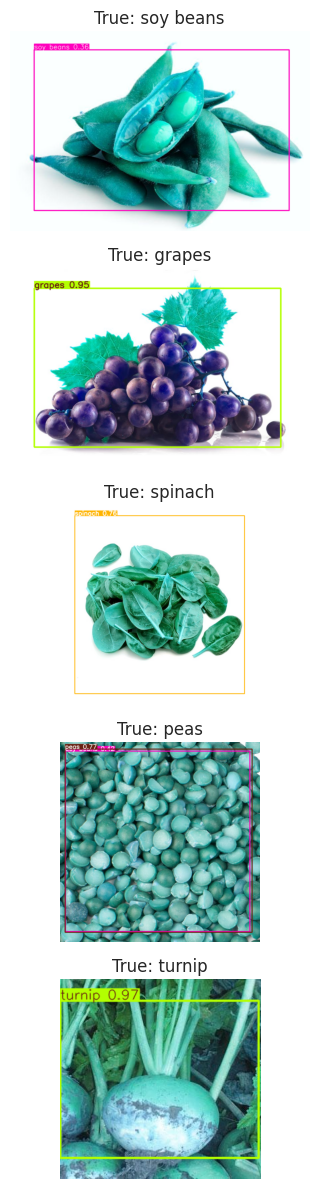

Sample predictions saved as: sample_predictions.png

In [28]:
console.print("[bold blue]Evaluating model performance...[/]")
metrics = model.val()

console.print(Panel("[bold green]Evaluation Results[/]", title="Model Performance"))
console.print(f"[cyan]mAP50-95:[/] {metrics.box.map:.4f}")
console.print(f"[cyan]mAP50:[/] {metrics.box.map50:.4f}")

# Handle precision and recall as arrays by using mean values
if isinstance(metrics.box.p, (list, np.ndarray)):
    console.print(f"[cyan]Mean Precision:[/] {np.mean(metrics.box.p):.4f}")
else:
    console.print(f"[cyan]Precision:[/] {metrics.box.p:.4f}")

if isinstance(metrics.box.r, (list, np.ndarray)):
    console.print(f"[cyan]Mean Recall:[/] {np.mean(metrics.box.r):.4f}")
else:
    console.print(f"[cyan]Recall:[/] {metrics.box.r:.4f}")

# Create a metrics table
metrics_table = Table(title="Performance Metrics")
metrics_table.add_column("Metric", style="cyan")
metrics_table.add_column("Value", style="green")
metrics_table.add_row("mAP50-95", f"{metrics.box.map:.4f}")
metrics_table.add_row("mAP50", f"{metrics.box.map50:.4f}")

# Handle arrays for table display
if isinstance(metrics.box.p, (list, np.ndarray)):
    metrics_table.add_row("Mean Precision", f"{np.mean(metrics.box.p):.4f}")
else:
    metrics_table.add_row("Precision", f"{metrics.box.p:.4f}")

if isinstance(metrics.box.r, (list, np.ndarray)):
    metrics_table.add_row("Mean Recall", f"{np.mean(metrics.box.r):.4f}")
else:
    metrics_table.add_row("Recall", f"{metrics.box.r:.4f}")

console.print(metrics_table)

console.print("[bold blue]Generating sample predictions...[/]")
val_img_dir = os.path.join(yolo_dir, "images", "val")
val_images = os.listdir(val_img_dir)
sample_images = random.sample(val_images, min(5, len(val_images)))

plt.figure(figsize=(15, 12))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(val_img_dir, img_name)

    class_id = img_name.split('_')[0]
    class_name = class_names.get(class_id, f"Class {class_id}")

    results = model.predict(img_path, conf=0.25)

    plt.subplot(len(sample_images), 1, i+1)
    plt.imshow(results[0].plot())
    plt.title(f"True: {class_name}")
    plt.axis('off')

plt.tight_layout()
plt.savefig("sample_predictions.png")
plt.show()

console.print(f"[green]Sample predictions saved as: sample_predictions.png[/]")

# **Save Model for Future Use**

In [30]:
console.print("[bold blue]Mounting Google Drive...[/]")
try:
    from google.colab import drive
    drive.mount('/content/drive')
    drive_mounted = True
    console.print("[green]Google Drive mounted successfully![/]")
except ImportError:
    drive_mounted = False
    console.print("[yellow]Not running in Google Colab, skipping Drive mounting[/]")

save_dir = "/content/drive/MyDrive/AgriBot/models" if drive_mounted else "saved_models"
os.makedirs(save_dir, exist_ok=True)

console.print("[bold blue]Saving model weights...[/]")

best_model_pt = os.path.join('runs', 'detect', 'fruit_veg_model', 'weights', 'best.pt')
if os.path.exists(best_model_pt):
    dest_pt = os.path.join(save_dir, "fruit_veg_detector_best.pt")
    shutil.copy2(best_model_pt, dest_pt)

    onnx_path = os.path.join(save_dir, "fruit_veg_detector_best.onnx")
    model_best = YOLO(best_model_pt)
    model_best.export(format="onnx", save=True, imgsz=640)

    exported_onnx = os.path.join('runs', 'detect', 'fruit_veg_model', 'weights', 'best.onnx')
    if os.path.exists(exported_onnx):
        shutil.copy2(exported_onnx, onnx_path)

    console.print(f"[green]Model saved as PyTorch format: {dest_pt}[/]")
    console.print(f"[green]Model saved as ONNX format: {onnx_path}[/]")
else:
    console.print("[yellow]Best model weights not found. Saving the last model instead.")
    last_model_path = os.path.join(save_dir, "fruit_veg_detector_last.pt")
    model.save(last_model_path)
    console.print(f"[green]Model saved as: {last_model_path}[/]")

yaml_save_path = os.path.join(save_dir, "data.yaml")
shutil.copy2(yaml_path, yaml_save_path)
console.print(f"[green]Data configuration saved as: {yaml_save_path}[/]")

model_info = {
    "name": "Fruit and Vegetable Detector",
    "version": "1.0",
    "date_trained": pd.Timestamp.now().strftime("%Y-%m-%d"),
    "framework": "YOLOv8",
    "model_size": "large",
    "input_size": 640,
    "num_classes": len(class_names),
    "classes": list(class_names.values()),
    "metrics": {
        "mAP50-95": float(metrics.box.map),
        "mAP50": float(metrics.box.map50),
        "mean_precision": float(np.mean(metrics.box.p)),  # Calculate mean precision
        "mean_recall": float(np.mean(metrics.box.r))      # Calculate mean recall
    }
}

model_info["metrics"]["class_metrics"] = {}
for i, class_name in enumerate(class_names.values()):
    if i < len(metrics.box.p):  # Ensure index is valid
        model_info["metrics"]["class_metrics"][class_name] = {
            "precision": float(metrics.box.p[i]),
            "recall": float(metrics.box.r[i])
        }

import json
with open(os.path.join(save_dir, "model_info.json"), "w") as f:
    json.dump(model_info, f, indent=4)

Mounting Google Drive...

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Google Drive mounted successfully!

Saving model weights...

Ultralytics 8.3.115 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 112 layers, 43,634,364 parameters, 0 gradients, 165.0 GFLOPs

PyTorch: starting from 'runs/detect/fruit_veg_model/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 40, 8400) (83.6 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.50...
ONNX: export success ✅ 8.4s, saved as 'runs/detect/fruit_veg_model/weights/best.onnx' (166.7 MB)

Export complete (14.7s)
Results saved to /content/runs/detect/fruit_veg_model/weights
Predict:         yolo predict task=detect model=runs/detect/fruit_veg_model/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/fruit_veg_model/weights/best.onnx imgsz=640 data=/content/yolo_dataset/data.yaml  
Visualize:       https://netron.app


Model saved as PyTorch format: /content/drive/MyDrive/AgriBot/models/fruit_veg_detector_best.pt

Model saved as ONNX format: /content/drive/MyDrive/AgriBot/models/fruit_veg_detector_best.onnx

Data configuration saved as: /content/drive/MyDrive/AgriBot/models/data.yaml

# **Loading Saved Model**

In [ ]:
console.print("[bold blue]Example: Loading model in future sessions[/]")

code_example = """
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
!pip install ultralytics
from ultralytics import YOLO
import os

# Load the model
model_path = '/content/drive/MyDrive/AgriBot/models/fruit_veg_detector_best.pt'
model = YOLO(model_path)

# Or if you saved ONNX model
# from ultralytics import YOLO
# model = YOLO('/content/drive/MyDrive/AgriBot/models/fruit_veg_detector_best.onnx')

# Make predictions
results = model('/content/sample_image.jpg')
"""

console.print(Panel(code_example, title="Code for future sessions", border_style="green"))

# **Test Loading the Model**

Testing saved model...


image 1/1 /content/yolo_dataset/images/val/15_img_483.jpg: 448x640 1 jalepeno, 71.5ms
Speed: 6.9ms preprocess, 71.5ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


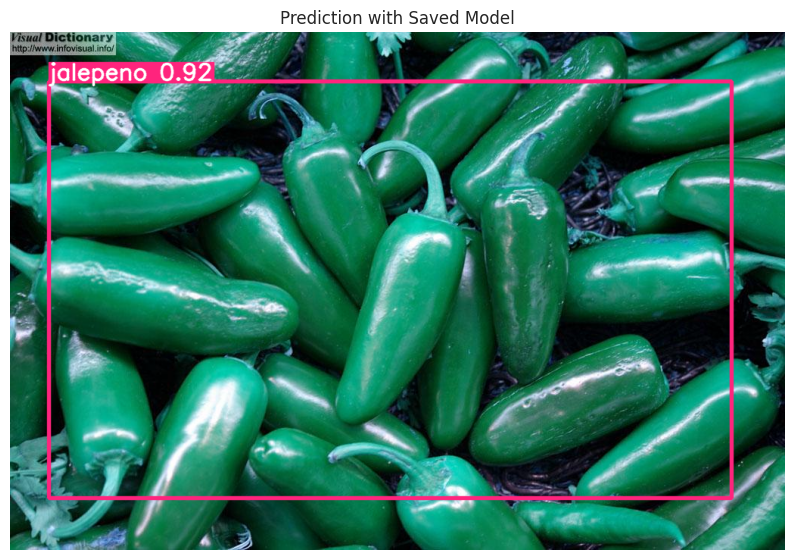

✓ Saved model loaded and tested successfully!

In [31]:
if drive_mounted and os.path.exists(os.path.join(save_dir, "fruit_veg_detector_best.pt")):
    console.print("[bold blue]Testing saved model...[/]")

    saved_model = YOLO(os.path.join(save_dir, "fruit_veg_detector_best.pt"))

    test_img = os.path.join(val_img_dir, random.choice(val_images))
    test_results = saved_model.predict(test_img, conf=0.25)

    plt.figure(figsize=(10, 8))
    plt.imshow(test_results[0].plot())
    plt.title("Prediction with Saved Model")
    plt.axis('off')
    plt.show()

    console.print("[bold green]✓ Saved model loaded and tested successfully![/]")

elif not drive_mounted:
    console.print("[yellow]Skipping model loading test - not running in Google Colab[/]")
else:
    console.print("[yellow]Saved model not found for testing[/]")

# **Detailed Performance Analysis**

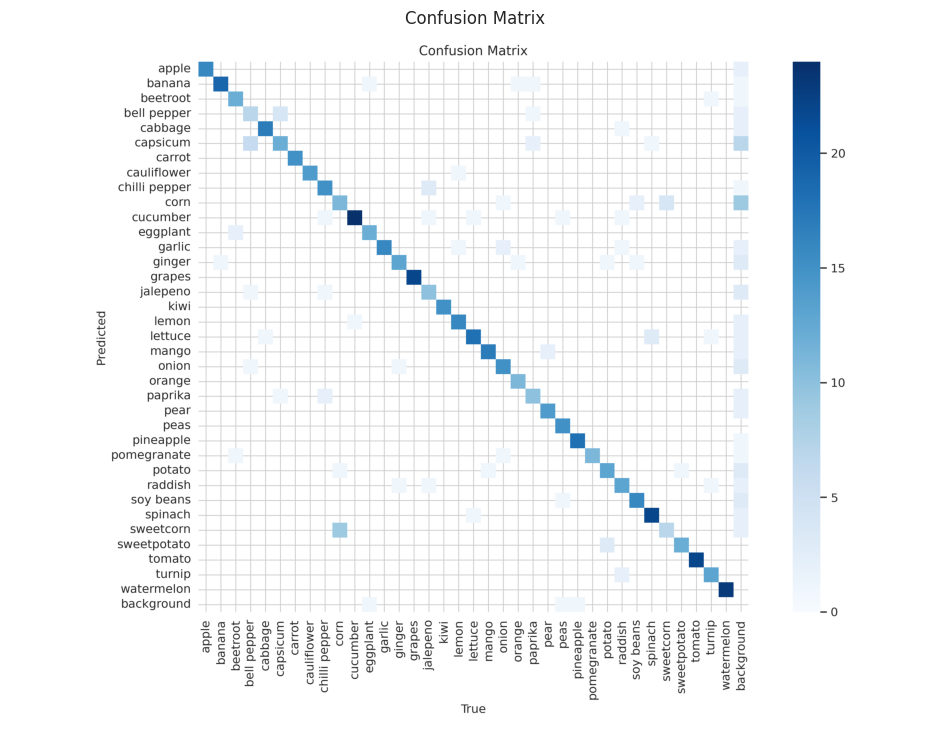

Confusion matrix saved to: /content/drive/MyDrive/AgriBot/models/confusion_matrix.png

Performance report saved to: /content/drive/MyDrive/AgriBot/models/performance_report.html

╭──────────────────────────────────────────────────── Success ────────────────────────────────────────────────────╮
│ Model Evaluation and Saving Complete                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [33]:
def get_class_name_from_index(idx):
    for k, v in class_indices.items():
        if v == idx:
            return class_names[k]
    return f"Class {idx}"

confusion_matrix_path = os.path.join('runs', 'detect', 'fruit_veg_model', 'confusion_matrix.png')
if os.path.exists(confusion_matrix_path):
    plt.figure(figsize=(12, 12))
    cm_img = plt.imread(confusion_matrix_path)
    plt.imshow(cm_img)
    plt.axis('off')
    plt.title('Confusion Matrix')
    plt.show()

    shutil.copy2(confusion_matrix_path, os.path.join(save_dir, "confusion_matrix.png"))
    console.print(f"[green]Confusion matrix saved to: {os.path.join(save_dir, 'confusion_matrix.png')}[/]")
else:
    console.print("[yellow]Confusion matrix not found[/]")

results_dir = os.path.join('runs', 'detect', 'fruit_veg_model')
if os.path.exists(results_dir):
    mean_precision = np.mean(metrics.box.p)
    mean_recall = np.mean(metrics.box.r)

    html_report = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <title>Fruit and Vegetable Detector - Performance Report</title>
        <style>
            body {{ font-family: Arial, sans-serif; margin: 20px; }}
            h1, h2 {{ color: #2C3E50; }}
            .metric {{ margin: 10px; padding: 15px; background-color: #f8f9fa; border-radius: 5px; }}
            img {{ max-width: 100%; border: 1px solid #ddd; border-radius: 5px; margin: 10px 0; }}
        </style>
    </head>
    <body>
        <h1>Fruit and Vegetable Detector - Performance Report</h1>
        <div class="metric">
            <h2>Model Information</h2>
            <p><strong>Date:</strong> {pd.Timestamp.now().strftime("%Y-%m-%d")}</p>
            <p><strong>Framework:</strong> YOLOv8</p>
            <p><strong>Classes:</strong> {len(class_names)}</p>
        </div>
        <div class="metric">
            <h2>Performance Metrics</h2>
            <p><strong>mAP50-95:</strong> {metrics.box.map:.4f}</p>
            <p><strong>mAP50:</strong> {metrics.box.map50:.4f}</p>
            <p><strong>Mean Precision:</strong> {mean_precision:.4f}</p>
            <p><strong>Mean Recall:</strong> {mean_recall:.4f}</p>
        </div>
        <h2>Visualizations</h2>
        <h3>Confusion Matrix</h3>
        <img src="confusion_matrix.png" alt="Confusion Matrix">
        <h3>Sample Predictions</h3>
        <img src="sample_predictions.png" alt="Sample Predictions">
    </body>
    </html>
    """

    class_metrics_html = "<h2>Per-Class Metrics</h2><table border='1' cellpadding='5'><tr><th>Class</th><th>Precision</th><th>Recall</th></tr>"
    for i, name in enumerate(class_names.values()):
        if i < len(metrics.box.p):
            class_metrics_html += f"<tr><td>{name}</td><td>{metrics.box.p[i]:.4f}</td><td>{metrics.box.r[i]:.4f}</td></tr>"
    class_metrics_html += "</table>"

    html_report = html_report.replace("</body>", class_metrics_html + "</body>")

    with open(os.path.join(save_dir, "performance_report.html"), "w") as f:
        f.write(html_report)

    console.print(f"[green]Performance report saved to: {os.path.join(save_dir, 'performance_report.html')}[/]")
else:
    console.print("[yellow]Results directory not found, skipping HTML report generation[/]")

console.print(Panel("[bold green]Model Evaluation and Saving Complete[/]", title="Success"))